# Crash course en Pandas y Plotnine
Pandas es una de las librerias fundamentales para analizar los datos en Python - toma inspiracion de los data frames de R y nos hace la vida facil.

Plotnine es una libreria mucho menos conocida pero vale la pena aprenderlo. Una critica comun de Python para data science es que R tiene mucho mejor capacidad de visualizacion de datos, gracias a la libreria de "ggplot". Ggplot es muy popular por haber inventado una "gramatica" de crear graficos que es muy intuitivo y muy flexible - mientras las opciones más tipicos de Python (matplotlib...) son todo lo opuesto (segun quien preguntas).

Plotnine es basicamente un port de ggplot a Python, entonces ya no tenemos problemas! Te estaras preguntando "si R tiene todo lo bueno y Python lo ha robado de ahi, porque no usamos R?" Por mi lo fuerte de Python no es que sea un lenguaje bueno para analizar datos, pero es un lenguaje bueno para hacer todo lo demas!

No queremos enseñar todo lo que hay, pero vale mucho la pena hacer un crash course para entender el core de estas librerias.

## Versiones??
No vamos a hacer nada que depende mucho de alguna version de Python ni libreria. Con tener una version de Python bastante actualizada basta. Si sois disciplinados y quereis utilizar entornos virtuales - recomiendo conda para trabajar con Jupyter.

In [448]:
from pathlib import Path

import pandas as pd
import plotnine as pn

# Nuestros ficheros
data_loc = Path('data')
house_file = data_loc / 'house-price-data.csv'

# Algo util para visualizar mas columnas
pd.set_option('display.max_columns', 500)

## Creando data frames
El objeto central de Pandas es el data frame. Es comparable a una "hoja de Excel" y es donde viven nuestros datos. Casi todo lo que vamos a hacer se orientara alrededor de crear un data frame y utilizar funciones del data frame para hacer nuestros analisis.

Lo fundamental es que un data frame tiene filas y columnas. Cada fila tiene un "nombre" que es el index y cada columna tiene un nombre que se refiere como la columna y ya esta. Acedemos a los datos referiendonos a los indices y columnas.

### Como se crean?
Realmente hay varias formas de crear un data frame. Lo mas comun es tener un diccionario de listas donde los "keys" son las columnas y las listas son los datos de cada fila.

Pandas es bastante listo y acepta otros formatos. Lo fundamental es que tiene que entender que son las filas y las columnas. No vamos a cubrir todo porque realmente es mas comun cargar datos directamente (no crear los DFs a mano).

In [449]:
data = {
    'columna_1': [1, 2, 3, 4, 5],
    'columna_2': [6, 7, 8, 9, 10],
    'columna_letras': ['a', 'b', 'c', 'd', 'e'],
}

my_df = pd.DataFrame(data)

my_df

,columna_1,columna_2,columna_letras
0,1,6,a
1,2,7,b
2,3,8,c
3,4,9,d
4,5,10,e


In [450]:
data = [
    (1, 6, 'a'),
    (2, 7, 'b')
]

pd.DataFrame(data, columns=['columna_1', 'columna_2', 'columna_letras'])

,columna_1,columna_2,columna_letras
0,1,6,a
1,2,7,b


## Cargando datos
No es lo mas habitular crear datos asi de esta forma (fuera de los tutoriales) - lo mas tipico es cargar unos datos externos directamente a un data frame. Posibles opciones son:

* Cargar un fichero CSV
* Cargar un JSON grande
* Leer un fichero desde un URL
* Leer datos directamente de una base de datos (lo mas comun en un ambito profesonal)

Vamos a cargar nuestros datos sobre usuarios de Twitter

In [451]:
house_data = pd.read_csv(house_file)
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

Ahora si que parece mas interesante! Unas observaciones:

* Como nuestro CSV tiene un formato bien hecho, todas las columnas se han cargado bien como esperamos - hay opciones para adaptar la carga a diferentes formatos
* Cuando carga de un CSV solo infiere que columnas son `str`, `int` y `float`

## Viendo los datos
Es importante "mirar" los datos que tenemos para asegurar que todo tiene sentido. Lo mas comun es imprimir el data frame (como vamos haciendo) o utilizar `head` o `tail` para ver solo unas lineas. Visualizar las columnas es muy similar, simplemente tenemos que referirnos a la columna con el sintaxis standard. Podemos tambien seleccionar varias columnas a la vez.

In [452]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [453]:
house_data['Neighborhood']

0       CollgCr
1       Veenker
2       CollgCr
3       Crawfor
4       NoRidge
         ...   
1455    Gilbert
1456     NWAmes
1457    Crawfor
1458      NAmes
1459    Edwards
Name: Neighborhood, Length: 1460, dtype: object

In [454]:
house_data[['Neighborhood', 'YearBuilt', 'GarageType']]

,Neighborhood,YearBuilt,GarageType
0,CollgCr,2003,Attchd
1,Veenker,1976,Attchd
2,CollgCr,2001,Attchd
3,Crawfor,1915,Detchd
4,NoRidge,2000,Attchd
...,...,...,...
1455,Gilbert,1999,Attchd
1456,NWAmes,1978,Attchd
1457,Crawfor,1941,Attchd
1458,NAmes,1950,Attchd


## Tipos de columnas
Las columnas siempre tienen un "tipo" y va un poco mas alla de los basicos de Python. Podemos ver que tipos tenemos utilizando `dtypes`

In [455]:
house_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Segun el tipo, diferentes operaciones hacen cosas distintas...

In [456]:
house_data.YrSold - house_data.YearBuilt

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Length: 1460, dtype: int64

In [457]:
house_data.SaleType + house_data.SaleCondition

0        WDNormal
1        WDNormal
2        WDNormal
3       WDAbnorml
4        WDNormal
          ...    
1455     WDNormal
1456     WDNormal
1457     WDNormal
1458     WDNormal
1459     WDNormal
Length: 1460, dtype: object

Un tipo importante mencionar es la fecha, declaramos una fecha asi:

In [458]:
pd.to_datetime('2000-01-01')

Timestamp('2000-01-01 00:00:00')

In [459]:
pd.to_datetime(pd.Series('2000-01-01')).dt.year

0    2000
dtype: int32

## Seleccionando los datos
Tenemos que poder seleccionar datos especificos. Hay 2 maneras comunes:

* Seleccionar utilizando el index
* Seleccionar utilizando una condicion / con un `bool`

In [460]:
# Seleccionar con el index
house_data.loc[1]

Id                    2
MSSubClass           20
MSZoning             RL
LotFrontage        80.0
LotArea            9600
                  ...  
MoSold                5
YrSold             2007
SaleType             WD
SaleCondition    Normal
SalePrice        181500
Name: 1, Length: 81, dtype: object

El otro caso comun es utilizar una condicion. Podemos comparar una columna contra un valor y nos devuelve algo que se llama una "serie" (como una lista o vector, pero especial de Pandas):

In [461]:
house_data.Neighborhood == 'Gilbert'

0       False
1       False
2       False
3       False
4       False
        ...  
1455     True
1456    False
1457    False
1458    False
1459    False
Name: Neighborhood, Length: 1460, dtype: bool

In [462]:
house_data.YearBuilt > 2000

0        True
1       False
2        True
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: YearBuilt, Length: 1460, dtype: bool

Con esto, podemos simplemente seleccionar las filas donde la comparativa es `True`

In [463]:
house_data[house_data.Neighborhood == 'Gilbert']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182,Unf,0,612,794,GasA,Gd,Y,SBrkr,794,676,0,1470,0,1,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2,388,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
72,73,60,RL,74.0,10141,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,832,832,GasA,Gd,Y,SBrkr,885,833,0,1718,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1998.0,Fin,2,427,TA,TA,Y,0,94,0,0,291,0,NaN,NaN,NaN,0,12,2009,WD,Normal,185000
84,85,80,RL,NaN,8530,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,BrkFace,22.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,804,670,0,1474,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,1995.0,Fin,2,400,TA,TA,Y,120,72,0,0,0,0,NaN,NaN,Shed,700,5,2009,WD,Normal,168500
86,87,60,RL,122.0,11911,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,684,684,GasA,Ex,Y,SBrkr,684,876,0,1560,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2005.0,Fin,2,400,TA,TA,Y,100,38,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,174000
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,680,790,0,1470,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1993.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,160.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1320,Unf,0,426,1746,GasA,Ex,Y,SBrkr,1746,0,0,1746,1,0,2,0,3,1,Ex,7,Typ,2,Gd,Attchd,2006.0,Fin,3,758,TA,TA,Y,201,39,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500
1401,1402,60,RL,62.0,7415,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,TA,TA,No,GLQ,759,Unf,0,80,839,GasA,Ex,Y,SBrkr,864,729,0,1593,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,2004.0,Fin,2,398,TA,TA,Y,100,75,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,193000
1430,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,Gd,Av,Unf,0,Unf,0,732,732,GasA,Ex,Y,SBrkr,734,1104,0,1838,0,0,2,1,4,1,TA,7,Typ,1,Gd,BuiltIn,2005.0,Fin,2,372,TA,TA,Y,100,40,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1433,1434,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,318.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,936,

In [464]:
house_data.loc[house_data.Neighborhood == 'Gilbert']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
50,51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182,Unf,0,612,794,GasA,Gd,Y,SBrkr,794,676,0,1470,0,1,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2,388,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000
72,73,60,RL,74.0,10141,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,832,832,GasA,Gd,Y,SBrkr,885,833,0,1718,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1998.0,Fin,2,427,TA,TA,Y,0,94,0,0,291,0,NaN,NaN,NaN,0,12,2009,WD,Normal,185000
84,85,80,RL,NaN,8530,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,BrkFace,22.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,804,670,0,1474,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,1995.0,Fin,2,400,TA,TA,Y,120,72,0,0,0,0,NaN,NaN,Shed,700,5,2009,WD,Normal,168500
86,87,60,RL,122.0,11911,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,684,684,GasA,Ex,Y,SBrkr,684,876,0,1560,0,0,2,1,3,1,Gd,6,Typ,1,Gd,BuiltIn,2005.0,Fin,2,400,TA,TA,Y,100,38,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal,174000
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,680,790,0,1470,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1993.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1389,20,RL,42.0,14892,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,9,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,160.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1320,Unf,0,426,1746,GasA,Ex,Y,SBrkr,1746,0,0,1746,1,0,2,0,3,1,Ex,7,Typ,2,Gd,Attchd,2006.0,Fin,3,758,TA,TA,Y,201,39,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,377500
1401,1402,60,RL,62.0,7415,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,TA,TA,No,GLQ,759,Unf,0,80,839,GasA,Ex,Y,SBrkr,864,729,0,1593,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,2004.0,Fin,2,398,TA,TA,Y,100,75,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,193000
1430,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,Gd,Av,Unf,0,Unf,0,732,732,GasA,Ex,Y,SBrkr,734,1104,0,1838,0,0,2,1,4,1,TA,7,Typ,1,Gd,BuiltIn,2005.0,Fin,2,372,TA,TA,Y,100,40,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1433,1434,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,318.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,936,

In [465]:
house_data[house_data.YearBuilt > 2000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1445,20,RL,63.0,8500,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,106.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1422,1422,GasA,Ex,Y,SBrkr,1422,0,0,1422,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,626,TA,TA,Y,192,60,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,179600
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,Y,SBrkr,1578,0,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0

Y si queremos tambien seleccionar una columna (o columnas), hacemos esto con `loc` asi

In [466]:
house_data.loc[house_data.Neighborhood == 'Gilbert', ['YearBuilt', 'SalePrice']]

,YearBuilt,SalePrice
50,1997,177000
72,1998,185000
84,1995,168500
86,2005,174000
95,1993,185000
...,...,...
1388,2006,377500
1401,2004,193000
1430,2005,192140
1433,2000,186500


### El index: lo bueno, lo malo, y lo feo...
Para su funcionamiento correcto, Pandas invento un concepto que se llama el "index". El index es un identificador de una fila que permite seleccionar esta fila o hasta "unificar" datos separados haciendo un "join" implicito utilizando este index.

In [467]:
# Example showing selection
house_data.loc[range(5, 10)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [468]:
# Example separating data with a condition and then adding it back on
selected_data = house_data.loc[range(5, 10), 'Neighborhood']
selected_data

5    Mitchel
6    Somerst
7     NWAmes
8    OldTown
9    BrkSide
Name: Neighborhood, dtype: object

In [469]:
modified_data = selected_data + '_test'
modified_data

5    Mitchel_test
6    Somerst_test
7     NWAmes_test
8    OldTown_test
9    BrkSide_test
Name: Neighborhood, dtype: object

In [470]:
house_data.Neighborhood = modified_data

In [471]:
house_data.Neighborhood.head(10)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5    Mitchel_test
6    Somerst_test
7     NWAmes_test
8    OldTown_test
9    BrkSide_test
Name: Neighborhood, dtype: object

Ahora, el index a a veces hace cosas muy raras... vamos a intentar coger el año de construcción de la viviendo con `id = 1` y sustraerlo del año de construcción de todas las demás viviendas.

In [472]:
yr_build_1 = house_data.loc[house_data.Id == 1, 'YearBuilt']
yr_build_1


0    2003
Name: YearBuilt, dtype: int64

In [473]:
house_data.YearBuilt - yr_build_1

0       0.0
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: YearBuilt, Length: 1460, dtype: float64

No ha funcionado porque de forma implicita Pandas ha hecho un join

In [474]:
house_data.YearBuilt - yr_build_1.values

0        0
1      -27
2       -2
3      -88
4       -3
        ..
1455    -4
1456   -25
1457   -62
1458   -53
1459   -38
Name: YearBuilt, Length: 1460, dtype: int64

`values` es la propiedad de la serie que contiene solo los valores - a menudo hay que usarlo para quitar el index

In [475]:
house_data = pd.read_csv(house_file)

## Creando columnas
Se crean las columnas de forma facil - nos refereimos a la columna nueva como si fuera una existente y asignamos

In [476]:
house_data['new_column'] = 'new'
house_data.new_column

0       new
1       new
2       new
3       new
4       new
       ... 
1455    new
1456    new
1457    new
1458    new
1459    new
Name: new_column, Length: 1460, dtype: object

In [477]:
house_data['year_built_after_2008'] = house_data.YearBuilt - 2008
house_data.year_built_after_2008

0       -5
1      -32
2       -7
3      -93
4       -8
        ..
1455    -9
1456   -30
1457   -67
1458   -58
1459   -43
Name: year_built_after_2008, Length: 1460, dtype: int64

### Creando columnas para "algunas" filas
Combinamos lo que ya hemos visto

In [478]:
house_data.loc[house_data.Neighborhood == 'Gilbert', 'gilbert_column'] = 'Giiiiiilbert'
house_data.gilbert_column

C:\Users\jsanchez\AppData\Local\Temp\ipykernel_9980\1166970999.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Giiiiiilbert' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1455    Giiiiiilbert
1456             NaN
1457             NaN
1458             NaN
1459             NaN
Name: gilbert_column, Length: 1460, dtype: object

In [479]:
house_data.loc[house_data.Neighborhood == 'Gilbert', 'gilbert_column']

50      Giiiiiilbert
72      Giiiiiilbert
84      Giiiiiilbert
86      Giiiiiilbert
95      Giiiiiilbert
            ...     
1388    Giiiiiilbert
1401    Giiiiiilbert
1430    Giiiiiilbert
1433    Giiiiiilbert
1455    Giiiiiilbert
Name: gilbert_column, Length: 79, dtype: object

## Vectorizacion
Algo muy especial de Pandas es que aprovecha de la vectorizacion de operaciones de Numpy. En Python los loops son lentos y los debemos de evitar. Entonces, como podemos hacer una operacion a todas las filas de nuestro data set? Pues simplemente aprovechamos (siempre cuando sea posible) las funciones vectorizadas

Ya hemos visto algunos ejemplos

In [480]:
# Dividir todo por 1000 sin loop
house_data.SalePrice / 1000

0       208.500
1       181.500
2       223.500
3       140.000
4       250.000
         ...   
1455    175.000
1456    210.000
1457    266.500
1458    142.125
1459    147.500
Name: SalePrice, Length: 1460, dtype: float64

In [481]:
# Ratio entre 2 columnas
house_data.SalePrice / house_data.LotArea

0       24.674556
1       18.906250
2       19.866667
3       14.659686
4       17.531557
          ...    
1455    22.104332
1456    15.939279
1457    29.473568
1458    14.626428
1459    14.843514
Length: 1460, dtype: float64

Hay muchos ejemplos! Con operaciones basicas casi siempre hay una funciona vectorizada y merece la pena buscar. Podemos llegar a hacer cosas complejas...

In [482]:
((
         (house_data.SalePrice / 1000) /
         (house_data.LotArea - house_data.loc[house_data.Neighborhood.str.contains('Ames').fillna(False), 'GarageArea'])
 ) ** 2).dropna()

7       0.000408
14      0.000221
16      0.000192
19      0.000366
26      0.000414
          ...   
1436    0.000202
1439    0.000319
1450    0.000228
1456    0.000275
1458    0.000225
Length: 298, dtype: float64

## Funciones tipicos y group bys
Hay algunas funciones muy tipicas para operaciones normales

In [483]:
house_data.LotArea.mean()

10516.828082191782

In [484]:
house_data.LotArea.median()

9478.5

In [485]:
house_data.LotArea.max()

215245

In [486]:
house_data.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [487]:
house_data.Neighborhood.value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

Tambien podemos hacer un group by como si fuera SQL - nota que ahora vamos a crear data frames nuevos donde los indedx son los "grupos"

In [488]:
house_data.groupby('Neighborhood').SalePrice.median().head()

Neighborhood
Blmngtn    191000.0
Blueste    137500.0
BrDale     106000.0
BrkSide    124300.0
ClearCr    200250.0
Name: SalePrice, dtype: float64

In [489]:
house_data.groupby('Neighborhood').SalePrice.median().reset_index().head()

,Neighborhood,SalePrice
0,Blmngtn,191000.0
1,Blueste,137500.0
2,BrDale,106000.0
3,BrkSide,124300.0
4,ClearCr,200250.0


Existen muchas funciones - merece la pena buscar antes de ponerte a inventar algo nuevo!

## Ponemos todo a prueba...

In [490]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new_column,year_built_after_2008,gilbert_column
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,new,-5,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,new,-32,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,new,-7,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,new,-93,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,new,-8,NaN


In [491]:
# Que es la fecha de construccion, renovacion y venta mas temprana?

In [492]:
min_year_built = house_data["YearBuilt"].min()
min_year_renovation = house_data["YearRemodAdd"].min()
min_year_sold = house_data["YrSold"].min()

print(f"La fecha de construcción más temprana es {min_year_built}.")
print(f"La fecha de renovación más temprana es {min_year_renovation}.")
print(f"La fecha de venta más temprana es {min_year_sold}.")

La fecha de construcción más temprana es 1872.
La fecha de renovación más temprana es 1950.
La fecha de venta más temprana es 2006.


In [493]:
# Que viviendas fueron?

In [494]:
record_older_year_build = house_data.loc[house_data['YearBuilt'].idxmin()]
record_older_year_renovation = house_data.loc[house_data['YearRemodAdd'].idxmin()]
record_older_year_sold = house_data.loc[house_data['YrSold'].idxmin()]

print(f"La vivienda con la construcción más temprana tiene el ID {record_older_year_build['Id']}")
print(f"La vivienda con la renovación más antigua tiene el ID {record_older_year_renovation['Id']}")
print(f"La vivienda con la venta más antigua tiene el ID {record_older_year_sold['Id']}")

La vivienda con la construcción más temprana tiene el ID 1350
La vivienda con la renovación más antigua tiene el ID 9
La vivienda con la venta más antigua tiene el ID 4


En los barrios con las viviendas MÁS y MENOS caras, como de grande suelen ser las viviendas?

In [495]:
neighborhood_group = house_data.groupby('Neighborhood')["SalePrice"].mean()
neighborhood_group.head(20)

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
Name: SalePrice, dtype: float64

In [496]:
neighborhood_group = house_data.groupby('Neighborhood')["SalePrice"].mean()

neighborhood_expensive = neighborhood_group.idxmax()
neighborhood_cheap = neighborhood_group.idxmin()

mean_area_by_neighborhood = house_data.groupby('Neighborhood')['LotArea'].mean()

mean_area_expensive = mean_area_by_neighborhood[neighborhood_expensive]
mean_area_cheap = mean_area_by_neighborhood[neighborhood_cheap]

print(
    f"El area media de la vivienda en el barrio con las viviendas mas caras es {mean_area_expensive:.2f} square feet.")
print(f"El area media de la vivienda en el barrio con las viviendas mas baratas es {mean_area_cheap:.2f} square feet.")

El area media de la vivienda en el barrio con las viviendas mas caras es 14218.90 square feet.
El area media de la vivienda en el barrio con las viviendas mas baratas es 2324.00 square feet.


# Alguna vivienda se ha vendido varias veces?

In [497]:
unique_identifier_columns = ["YearBuilt", "YearRemodAdd", "Neighborhood", "Street", "MSSubClass", "MSZoning"]

group_houses = house_data.groupby(unique_identifier_columns)

groups = house_data.groupby(unique_identifier_columns).size().reset_index(name='count')
duplicate_keys = groups[groups['count'] > 1][unique_identifier_columns]

duplicates = pd.merge(house_data, duplicate_keys, on=unique_identifier_columns)

duplicates.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,new_column,year_built_after_2008,gilbert_column
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,new,-5,NaN
1,249,60,RL,72.0,11317,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,101.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,840,840,GasA,Ex,Y,SBrkr,840,828,0,1668,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,500,TA,TA,Y,144,68,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal,180000,new,-5,NaN
2,821,60,RL,72.0,7226,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,798,798,GasA,Ex,Y,SBrkr,798,842,0,1640,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2003.0,RFn,2,595,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,183000,new,-5,NaN
3,833,60,RL,44.0,9548,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,6,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,223.0,Gd,TA,PConc,Gd,TA,No,GLQ,483,Unf,0,458,941,GasA,Ex,Y,SBrkr,941,888,0,1829,1,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2003.0,RFn,2,613,TA,TA,Y,192,39,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Normal,237000,new,-5,NaN
4,1241,60,RL,65.0,8158,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,252.0,Gd,TA,PConc,Gd,TA,No,GLQ,550,Unf,0,334,884,GasA,Ex,Y,SBrkr,884,884,0,1768,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,543,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,224900,new,-5,NaN


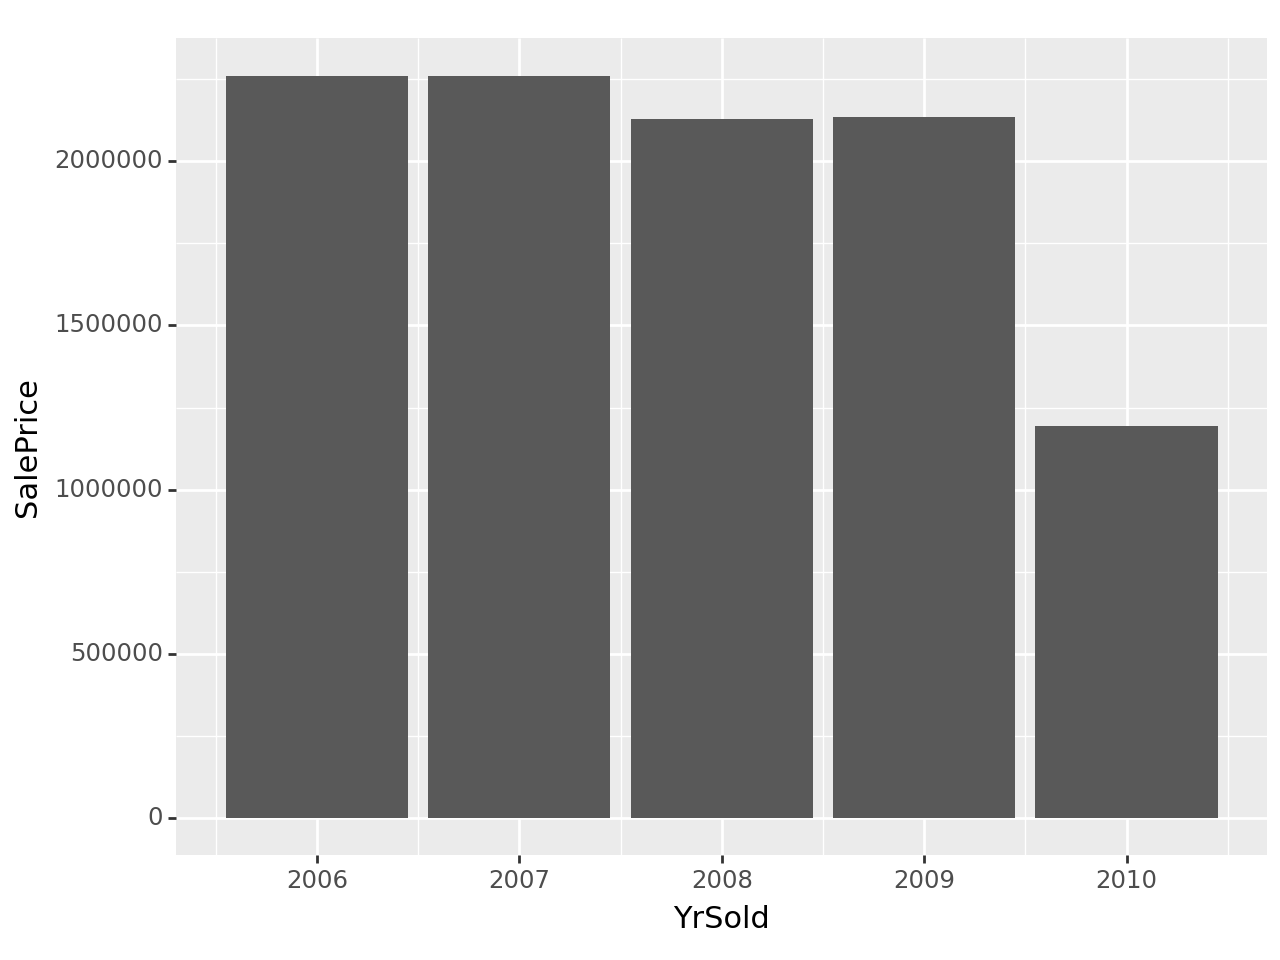

In [511]:
# Los precios están subiendo o bajando?
group_price = house_data.groupby(["YrSold", "MoSold"])["SalePrice"].mean().reset_index()
group_price

graph = pn.ggplot(
    group_price,
    pn.aes(x='YrSold', y='SalePrice'),
) + pn.geom_bar(stat='identity')

graph.draw()

## Creando visualizaciones
Data frames muy guay pero no es siempre la mejor forma de transmitir conclusiones.

Una visualizacion se compone por unas piezas importantes:

* Un data frame
* Un(os) "aesthetics"
* Una(s) gemoetrias
* Un(os) temas o "themes"

Todos los graficos se constuyen a partir de estas piezas y nos permite crear visualizaciones simples o complejas.

In [499]:
data = pd.DataFrame({
    'columna_1': [1, 2, 3, 4, 5],
    'columna_2': [6, 7, 8, 9, 10],
    'columna_letras': ['a', 'a', 'd', 'd', 'e'],
})

graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_point()

graph.draw();

In [500]:
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_point() + pn.theme(
    axis_text=pn.element_text(size=20))

graph.draw();

## Los geometrias más comunes

In [501]:
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_line()

graph.draw();

In [502]:
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_col()

graph.draw();

In [503]:
graph = pn.ggplot(data, pn.aes(x='columna_1')) + pn.geom_histogram()

graph.draw();

C:\Python311\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.


## Otras cosas...

In [504]:
# cambiar las etiquetas
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_point() + pn.xlab('Mejor etiqueta para la X')

graph.draw();

In [505]:
# Combinar geometrias
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_line() + pn.geom_point()

graph.draw();

In [506]:
# Darle un poco de estilo
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_point(color='red', size=10, shape='x')

graph.draw();

In [507]:
# Color por variables
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2', color='columna_letras')) + pn.geom_point(size=10)

graph.draw();

In [508]:
# Color por variables
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2', color='columna_letras')) + pn.geom_line(
    size=5) + pn.geom_point(size=10)

graph.draw();